# Logistic Regression Classifier using Gradient Descent and Stochastic Gradient Descent

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

mnist_49_3000 = sio.loadmat('mnist_49_3000.mat')
x = mnist_49_3000['x']
y = mnist_49_3000['y']
d, n = x.shape

In [2]:
ntr = 2000  # number of training points
nts = n - 2000  # number of testing points

x_tilde = np.concatenate([np.ones([1, n]), x], axis=0)  # append vector of 1 for the bias term

# Split data into training/testing set
xtr = x_tilde[:, :ntr]
xts = x_tilde[:, ntr:]
ytr = y[:, :ntr]
yts = y[:, ntr:]

In [3]:
#Helper functions

# Define sigmoid function
def sigmoid_func(t):
    return 1. / (1 + np.exp(-t))


# Define derivative of sigmoid function
def sigmoid_func_derive(t):
    return np.exp(-t) / np.square(1 + np.exp(-t))


# Phi (defined in problem 3(a))
def phi(t):
    return np.log(1 + np.exp(-t))


def obj_func(xtr, ytr, lam, theta):
    
    obj_val = np.sum(phi(xtr.T.dot(theta) * ytr.T)) + lam * np.square(np.linalg.norm(theta))
    return obj_val

### Logistic Regression Classifier with Gradient Descent

In [4]:
# Implementation of Gradient Descent
def GD(x, gf, eta, fun=lambda x,itr: 0, niter=100, eps=1e-5):    
    '''
    Input: 
        x:     intilalization 
        gf:    gradient function takes position argument 
        eta:   step size
        fun:   objective value takes position argument 
        niter: number of iterations 
        eps:   tolerance for termination criteria 

    Itermediate: 
        grad:  gradient

    Output: 
        x:     final solution 
        itr:   numer of iteration 
        out:   objective values per iterations 
    '''
    out=np.empty(niter+1)
    out[0] = fun(x,0)
    for itr in range(niter):
        '''
        TODO: Fill in the code to implement GD
        '''
        x -= eta * gf(x)
        out[itr+1] = fun(x,itr+1)
        if (np.abs(out[itr+1] - out[itr])/np.abs(out[itr])  < eps):
            return x, itr, out[:itr+1]
        itr += 1
    
    out[: itr+1] = fun(x,itr+1)
    return x, itr, out[:itr+1]

In [5]:
# Initialize with the zero vector. +1 for the bias term
lam = 10.0
eps = 1e-5
Niter = 2000 #maximum number of iterations

# TODO:  Compute the step size
_sum = 0
for i in range(ntr):
    _sum += np.dot(xtr[:,i], xtr[:,i])

L = 2*lam + 0.25*_sum # (2*lambda + 0.25 * sum of )
step_size = 2/(L + 2*lam)

# TODO: implement the Gradient function
#       if you prefer not use lambda function 
#       that is acceptable as well

def grad(z):
    gf = np.zeros([d+1,1])
    gf[:,0] = ( 2 * lam ) * z[:,0]
    for i in range(ntr):
        gf[:,0] -= xtr[:,i] * ytr[:,i][0] / ( 1 + np.exp( ytr[:,i][0] * np.dot(z[:,0], xtr[:,i])))
    return gf
                

#grad = lambda z: ( 2 * lam / ntr ) * z  -  xtr[:,i] * ytr[:,i] / ( 1 + np.exp( ytr[:,i] * np.dot(z[:,0], xtr[:,i]) )

obj = lambda z,itr: obj_func(xtr,ytr,lam, z)

theta, niter, out = GD(np.zeros([d+1,1]), grad, step_size, obj, Niter,eps)

# Logistic regression estimate
y_pred = np.ones([yts.shape[1], 1]) * -1
y_pred[xts.T.dot(theta) >= 0] = 1
test_error = np.sum(y_pred.T != yts) * 100. / float(nts)

print("The test error of the logistic regression classifier is {}".format(test_error))
print("Number of iterations needed: {}".format(niter))

The test error of the logistic regression classifier is 4.8
Number of iterations needed: 1012


Text(0, 0.5, 'Objective value')

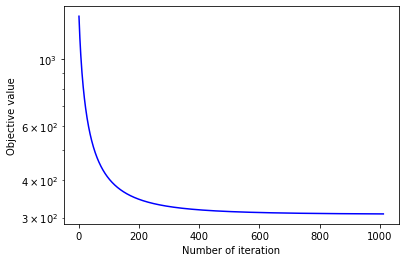

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

fig, ax = plt.subplots()

ax.plot(np.arange(niter+1),np.array(out),'b')
ax.set_yscale("log")
ax.set_xlabel('Number of iteration')
ax.set_ylabel('Objective value')

### Logistic Regression Classifier with Stochastic Gradient Descent

In [16]:
# Implementation of SGD
def SGD(x, sgf, ns, eta=1, fun=lambda x,itr: 0, nepoch=100, eps=1e-5):
    '''
    Input: 
        x:      intilalization 
        sgf:    stochastic gradient function takes position argument 
        ns:     number of training samples  
        fun:    objective value takes position argument 
        nepoch: number of iterations 
        eps:    tolerance for termination criteria 

    Itermediate: 
        d:      length of x  
        sgrad:  stochastic gradient

    Output: 
        x:      final solution 
        epoch:  number of epoches
        itr:    total number of iterations 
        out:    objective values per iterations 
    '''
    itr = 0
    d = len(x)
    out= np.empty(nepoch+1)
    out[0] = fun(x,0)
    for epoch in range(nepoch):
        '''
        TODO: Fill in the code to implement SGD
        '''
        # create randomized order of indices
        rand_indices = np.array([i for i in range(ns)])
        np.random.shuffle(rand_indices)
        
        for i in rand_indices:
            eta = 1 / np.sqrt(itr + 1)
            x = x -  eta * sgf(x, i)
            itr += 1
        
        out[epoch+1] = fun(x,epoch+1)
        if (np.abs(out[epoch+1] - out[epoch])/np.abs(out[epoch])  < eps):
            return x, epoch, out[:epoch+1]
        
        epoch += 1
    return x, epoch, out[:epoch+1]

In [17]:
# Initialize with the zero vector. +1 for the bias term
lam = 10.0
eps = 1e-5
nepoch = 300 #maximum number of epcohes 

# TODO: implement the stochastic gradient function
#       with respect to sampe i at location z
#       if you prefer not use lambda function 
#       that is acceptable as well

def sgf(z, i):
    gf = np.zeros([d+1,1])
    gf[:,0] = - xtr[:,i] * ytr[:,i][0] / ( 1 + np.exp( ytr[:,i][0] * np.dot(z[:,0], xtr[:,i]))) + ( 2 * lam ) * z[:,0] / ntr
    return gf

#sgf = lambda z,i: - xtr[:,i] * ytr[:,i][0] / ( 1 + np.exp( ytr[:,i][0] * np.dot(z, xtr[:,i]))) + ( 2 * lam ) * z / ntr



obj = lambda z,itr: obj_func(xtr,ytr,lam, z)
theta, epoch, out = SGD(np.zeros([d+1,1]), sgf=sgf, eta=1, ns=ntr, fun=obj, nepoch=nepoch,eps=eps)

# Logistic regression estimate
y_pred = np.ones([yts.shape[1], 1]) * -1
y_pred[xts.T.dot(theta) >= 0] = 1
test_error = np.sum(y_pred.T != yts) * 100. / float(nts)

print("The test error of the logistic regression classifier is {}".format(test_error))
print("Number of epochs needed: {}".format(epoch))

The test error of the logistic regression classifier is 4.8
Number of epochs needed: 300


Text(0, 0.5, 'Objective value')

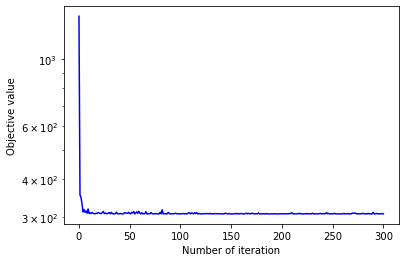

In [18]:
fig, ax = plt.subplots()

ax.plot(np.arange(epoch+1),np.array(out),'b')
ax.set_yscale("log")
ax.set_xlabel('Number of iteration')
ax.set_ylabel('Objective value')

We see that stochastic gradient descent achieves an acceptable classifier significantly earlier than the standard gradient descent method.